# Univ.AI Project: FIFA 2020

The project is designed to highlight three significant aspects as per the Sofifa EA data. The project has been divided into three parts: A, B and C.

## Roadmap 

The below schema illustrates how the project was carried out.
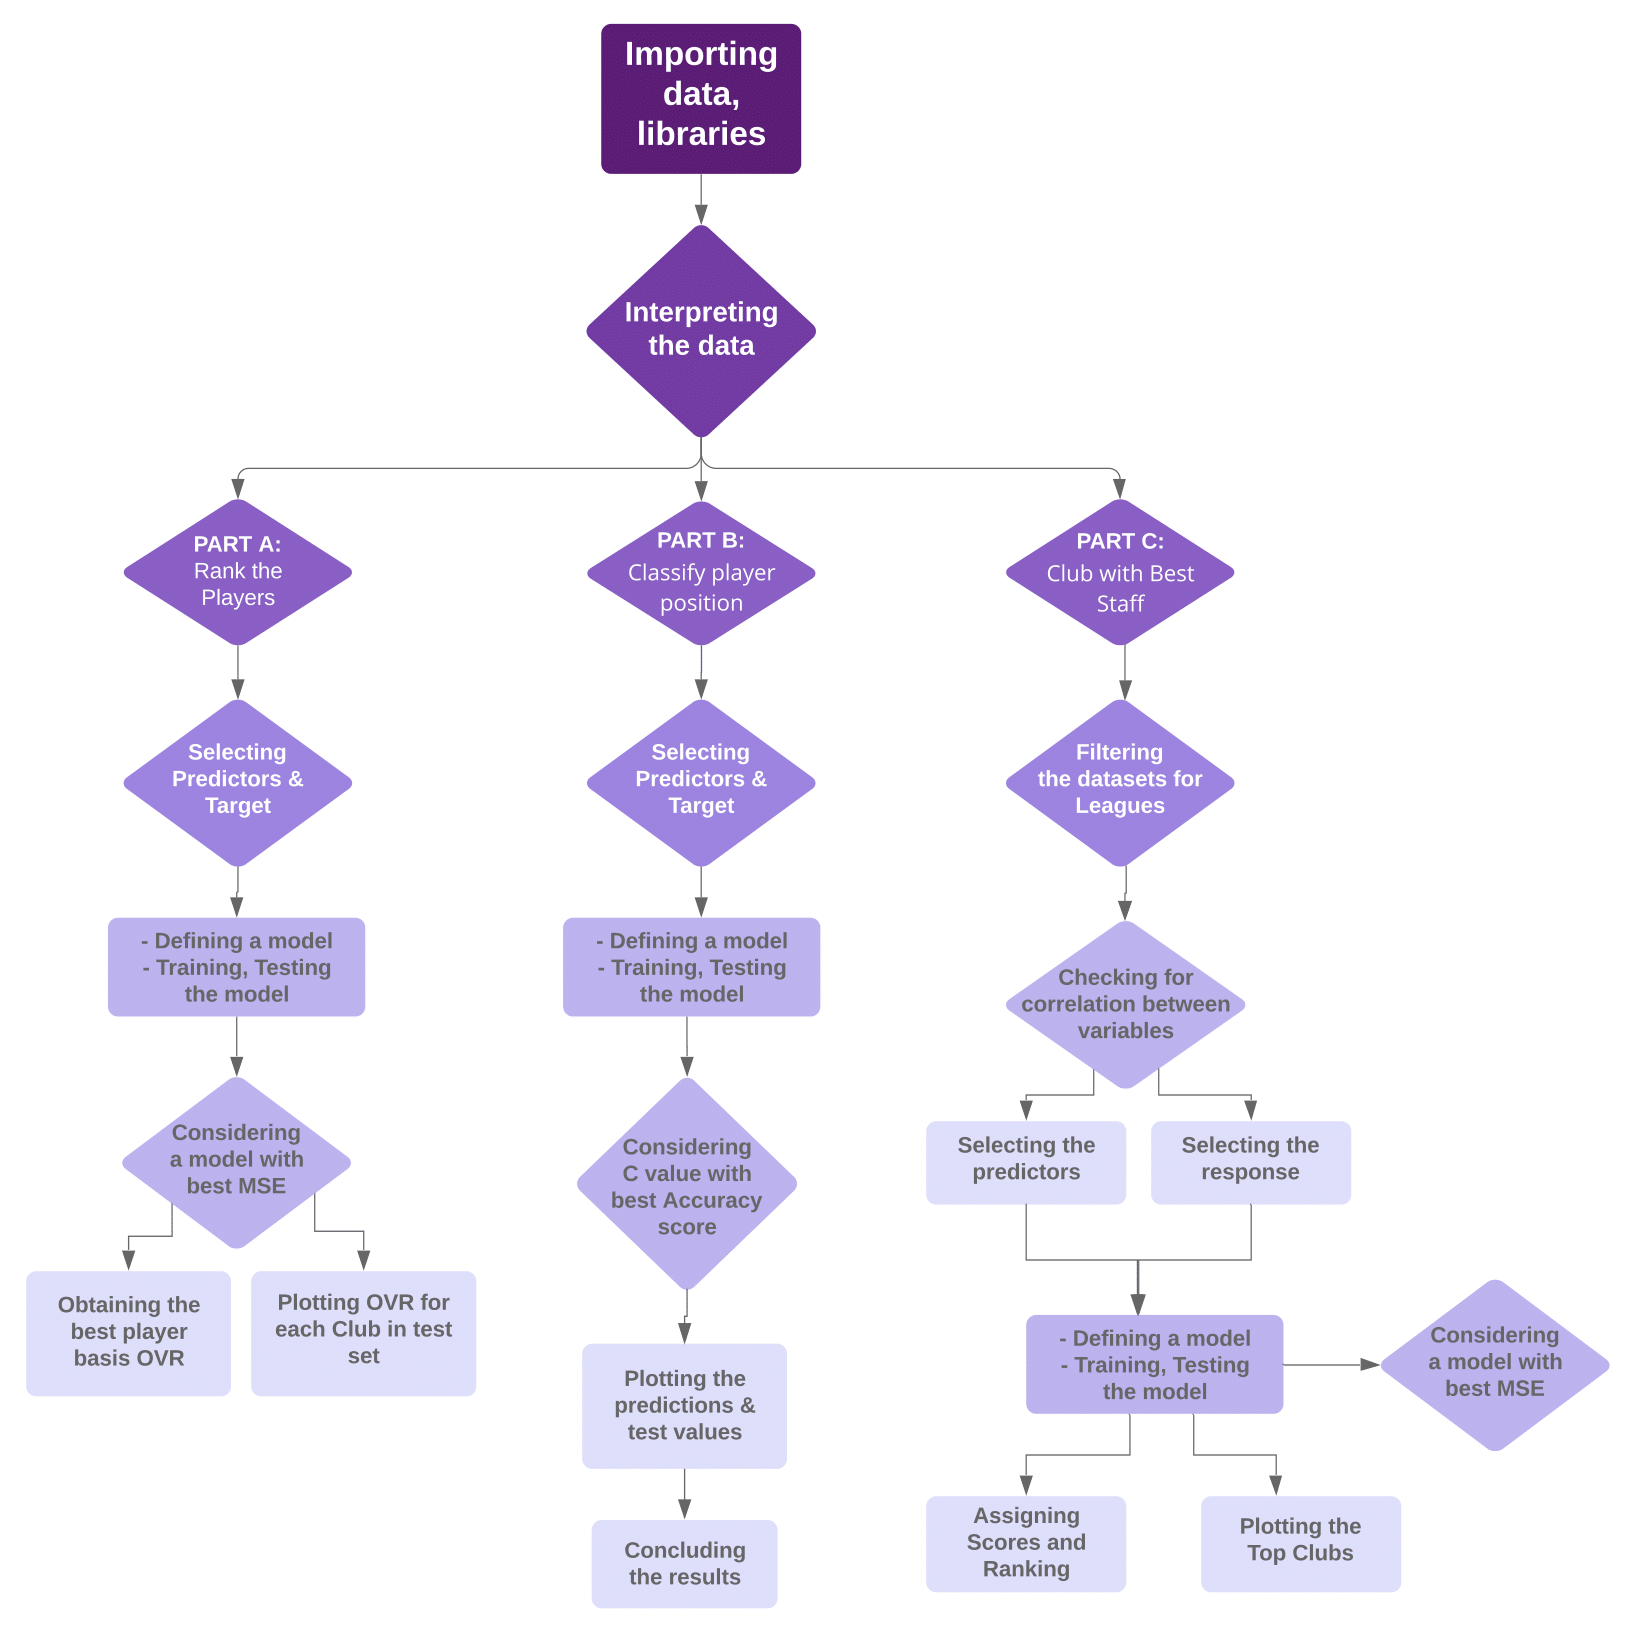



In [ ]:
import numpy as np
import pandas as pd
import zipfile

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<div style = "background: lightblue;color:black" class="alert alert-block alert-danger" >

<h2>Part A - Rank the Players</h2>

> *Who is the best player in the world according to your analysis?*

1. Use data from FIFA 19. Predict the Overall (OVR) skill Statistic for players in the FIFA 20 Edition. Train on all players from FIFA 19.

2. Graphically represent the Overall data for the players in test set (see below)

#### Instructions : 
* Sofifa Id, URL, Name, Potential, Real face, URL variables cannot be used during the prediction or learning. 

* In case of a change in playing position, alter FIFA 20 position to match FIFA 19 Position 

* The final score will be assigned using MSE. 

* Test Set: Players from the following Clubs:
**FC Barcelona, FC Bayern München, Real Madrid, Paris Saint-Germain, Juventus, Manchester City, Liverpool FC**
    
</div>

In [ ]:

df_19=pd.read_csv('players_19.csv')
df_20=pd.read_csv('players_20.csv')
# print(list(df_19.columns))

In [ ]:
#considering the specific columns to predict OVR
skillset=['age','international_reputation','pace','shooting','passing','defending','physic','gk_speed','gk_positioning', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [4]:
#cleaning the training data
df_19['player_positions']=df_19['player_positions'].str.split(',').str[0] #delimit by , and considering only first
df_train=df_19.drop(columns=['sofifa_id', 'player_url', 'short_name','long_name', 'potential', 'real_face'],axis=1) #dropping some columns
df_train.head()

,age,dob,height_cm,weight_kg,nationality,club,overall,value_eur,wage_eur,player_positions,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,33,1985-02-05,187,83,Portugal,Juventus,94,77000000,405000,ST,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,31,1987-06-24,170,72,Argentina,FC Barcelona,94,110500000,565000,CF,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,118500000,290000,LW,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,27,1990-11-07,193,76,Spain,Manchester United,91,72000000,260000,GK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27,1991-06-28,181,70,Belgium,Manchester City,91,102000000,355000,CAM,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [5]:
df_20['player_positions']=df_20['player_positions'].str.split(',').str[0]
df_20['player_positions']=df_19['player_positions']
test_club=['FC Barcelona','FC Bayern München','Real Madrid','Paris Saint-Germain','Juventus','Manchester City','Liverpool']

df_test=df_20[df_20['club'].isin(test_club)].drop(columns=['sofifa_id', 'player_url', 'short_name','long_name', 'potential', 'real_face'],axis=1)
df_test.head(100)

,age,dob,height_cm,weight_kg,nationality,club,overall,value_eur,wage_eur,player_positions,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,1987-06-24,170,72,Argentina,FC Barcelona,94,95500000,565000,ST,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,34,1985-02-05,187,83,Portugal,Juventus,93,58500000,405000,CF,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,105500000,290000,LW,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,28,1991-01-07,175,74,Belgium,Real Madrid,91,90000000,470000,CAM,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,28,1991-06-28,181,70,Belgium,Manchester City,91,90000000,370000,CB,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,32,1987-04-04,189,90,Germany,Juventus,83,19500000,135000,RW,...,75+3,81+3,81+3,81+3,75+3,75+3,80+3,80+3,80+3,75+3
218,29,1990-06-17,182,80,England,Liverpool,83,22000000,115000,CAM,...,79+2,81+2,81+2,81+2,79+2,78+2,77+2,77+2,77+2,78+2
220,28,1990-12-26,183,76,Wales,Juventus,83,25500000,140000,CB,...,75+3,76+3,76+3,76+3,75+3,73+3,70+3,70+3,70+3,73+3
224,31,1988-02-12,183,81,Argentina,Manchester City,83,19000000,145000,CDM,...,71+3,77+3,77+3,77+3,71+3,73+3,81+3,81+3,81+3,73+3


In [6]:
#defining a helper function to convert objects like '76+3' into 'integers'
import string
def str_int(s):
    if s != 'nan':
        return eval(s) #eval(s) evaluates on the arithmetic operator
    else:    
        return s #should ideally return all 'nan' values since only 2 categories of data exists

In [7]:
#applying the above helper function to the test and train set
skills_train=df_train[skillset]
skills_train=skills_train.astype(str).applymap(str_int)
#skills_train.head(310)
skills_test=df_test[skillset]
skills_test=skills_test.astype(str).applymap(str_int)
#skills_test.head(310)

In [8]:
#replacing the blanks with mean of the columns
imputer=SimpleImputer(strategy='mean')
skills_train_new=pd.DataFrame(imputer.fit_transform(skills_train))
skills_train_new.columns=skills_train.columns
skills_test_new=pd.DataFrame(imputer.fit_transform(skills_test))
skills_test_new.columns=skills_test.columns
#skills_train_new.info()

In [9]:
#specifying dependent & independent variables
y_train=df_train.overall
y_test=df_test.overall
x_test=skills_test_new
x_train=skills_train_new

In [10]:
#defining a model
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
print('MSE(Multi Reg)',MSE)

MSE(Multi Reg) 21.01057923211284


In [11]:
#creating a new dataframe with predicted OVR
new_test_df=df_20[df_20['club'].isin(test_club)].copy()
new_test_df['predicted_overall']=y_pred
final_data=new_test_df.round(0).astype({'predicted_overall': 'int32'})

In [16]:
final_data.head(50)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,predicted_overall
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,98
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,100
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,95
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,94
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,94
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3,94
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3,92
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3,92
10,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,...,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3,92


In [17]:
final_data[['predicted_overall']].idxmax() #index of the maximum value of the predicted overall column

predicted_overall    1
dtype: int64

In [18]:
final_data['long_name'][1] #value corresponding to idxmax

'Cristiano Ronaldo dos Santos Aveiro'

In [19]:
print ('The best player in the world is:', final_data['long_name'][final_data[['predicted_overall']].idxmax()][1])

The best player in the world is: Cristiano Ronaldo dos Santos Aveiro


<div style = "background: lightgreen ;color:black" class="alert alert-block alert-danger" >
<h3>Cristiano Ronaldo is the best player in the world, as per the analysis, when he plays as Center Forward.</h3>
<I>A peculiar catch was noticed when we included International Reputation to predict Overall Ranking, in which case Ronaldo's ranking was predicted to be a whooping 100! This does seem a little unrealistic but solidifies his stance.</I>

### Plots of OVR for each Club in Test Set

In [20]:
#segregating predicted OVR for each club of the test set
def club(x):
    return final_data[final_data['club']==x][['predicted_overall']]

In [21]:
#importing to add Club Logo Images in each Plot
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

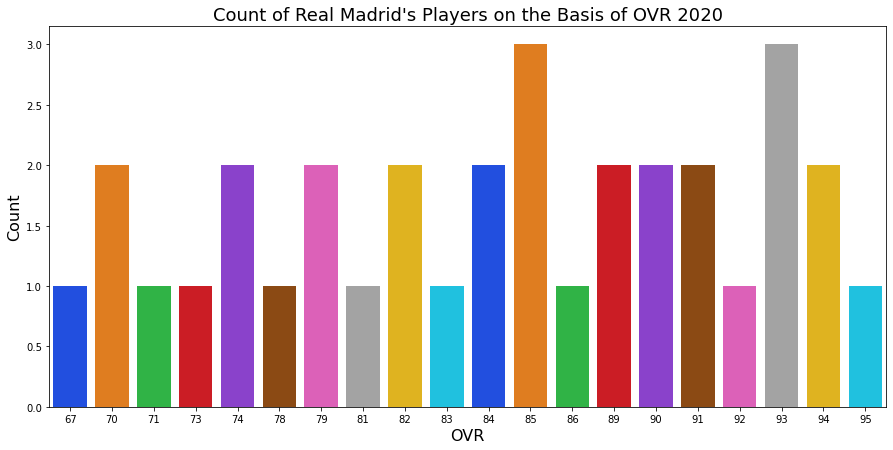

In [26]:
realmadrid=club('Real Madrid')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=realmadrid, palette='bright')
ax.set_title(label='Count of Real Madrid\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
#realmad = mpimg.imread('C:/Users/Ayesha/Desktop/realmadrid.png')

#imagebox = OffsetImage(realmad, zoom=0.5)

#ab = AnnotationBbox(imagebox, (0.58,2.63))

#ax.add_artist(ab)

plt.show()

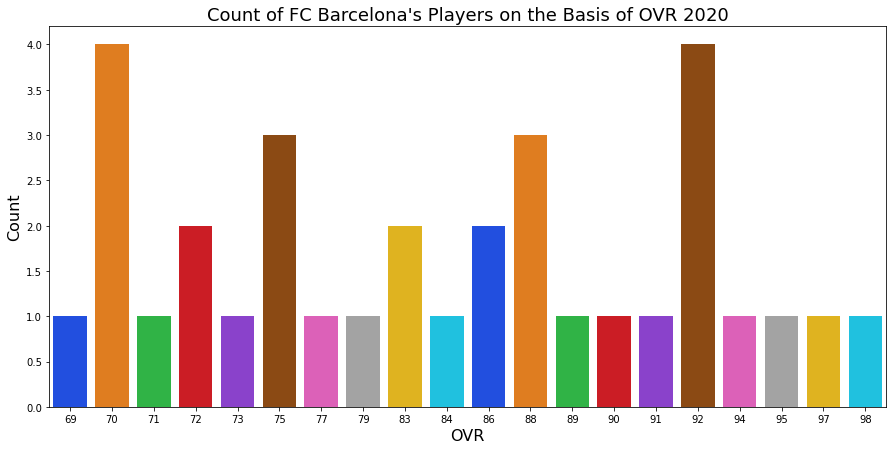

In [28]:
fcbarcelona=club('FC Barcelona')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=fcbarcelona, palette='bright')
ax.set_title(label='Count of FC Barcelona\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

#fcbarca= mpimg.imread('C:/Users/Ayesha/Desktop/fcbarca.png')

#imagebox = OffsetImage(fcbarca, zoom=0.4)

#ab = AnnotationBbox(imagebox, (18.3, 3.65))

#ax.add_artist(ab)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Ayesha/Desktop/fcbayernm.png'

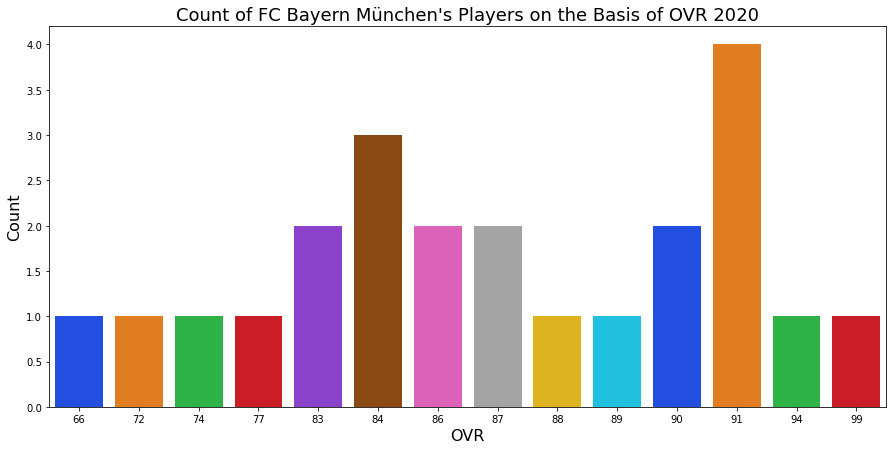

In [29]:
fcbayernmunchen=club('FC Bayern München')

plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=fcbayernmunchen, palette='bright')
ax.set_title(label='Count of FC Bayern München\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
fcbayernm = mpimg.imread('C:/Users/Ayesha/Desktop/fcbayernm.png')

imagebox = OffsetImage(fcbayernm, zoom=0.5)

ab = AnnotationBbox(imagebox, (0.5, 3.54))

ax.add_artist(ab)
plt.show()

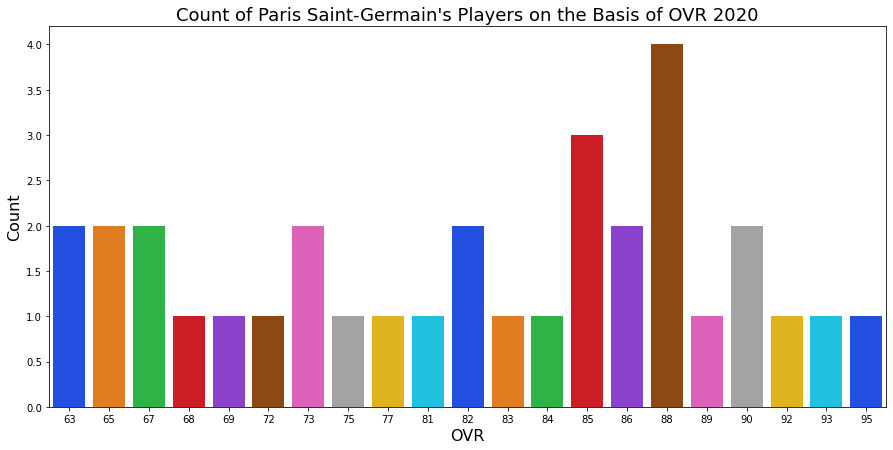

In [34]:
parissaintgerm=club('Paris Saint-Germain')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=parissaintgerm, palette='bright')
ax.set_title(label='Count of Paris Saint-Germain\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
#paris = mpimg.imread('C:/Users/Ayesha/Desktop/paris.png')

#imagebox = OffsetImage(paris, zoom=0.5)

#ab = AnnotationBbox(imagebox, (0.98, 3.54))

#ax.add_artist(ab)
plt.show()

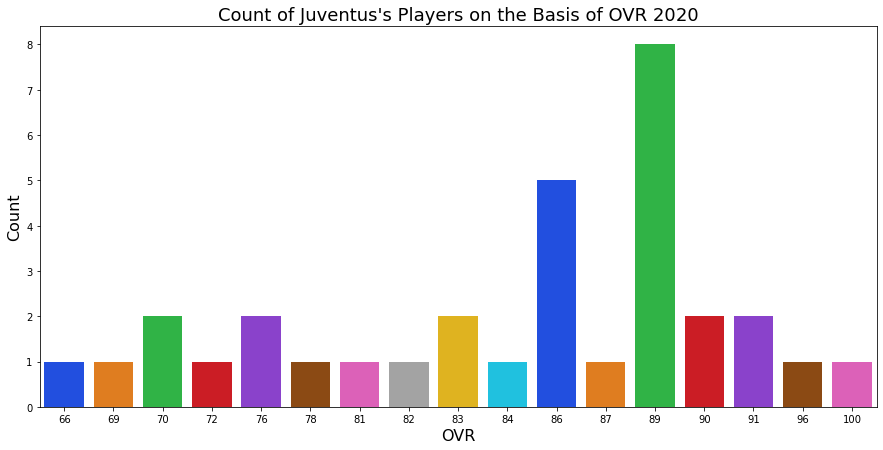

In [37]:
Juventus=club('Juventus')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=Juventus, palette='bright')
ax.set_title(label='Count of Juventus\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
#juventus = mpimg.imread('C:/Users/Ayesha/Desktop/juventus.png')

#imagebox = OffsetImage(juventus, zoom=0.3)

#ab = AnnotationBbox(imagebox, (0.35, 6.62))

#ax.add_artist(ab)
plt.show()

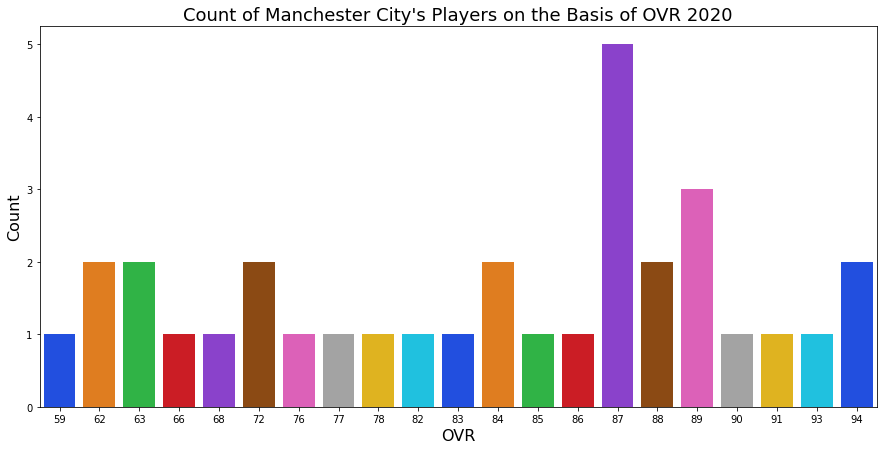

In [39]:
manchestercity=club('Manchester City')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=manchestercity, palette='bright')
ax.set_title(label='Count of Manchester City\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

#manc = mpimg.imread('C:/Users/Ayesha/Desktop/manc.png')

#imagebox = OffsetImage(manc, zoom=0.09)

#ab = AnnotationBbox(imagebox, (1, 4.45))

#ax.add_artist(ab)
plt.show()

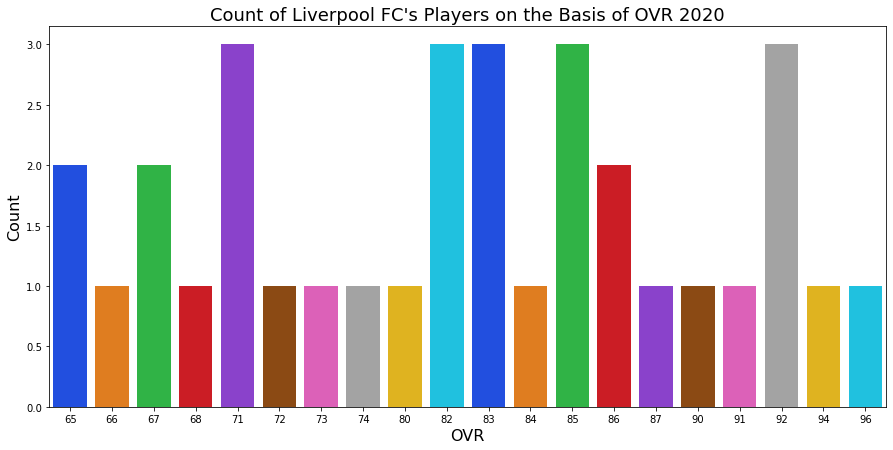

In [41]:
liverpool=club('Liverpool')
plt.figure(figsize= (15,7))

ax = sns.countplot(x='predicted_overall', data=liverpool, palette='bright')
ax.set_title(label='Count of Liverpool FC\'s Players on the Basis of OVR 2020', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

#livp = mpimg.imread('C:/Users/Ayesha/Desktop/livp.png')

#imagebox = OffsetImage(livp, zoom=0.3)

#ab = AnnotationBbox(imagebox, (1.02, 2.63))

#ax.add_artist(ab)

plt.show()

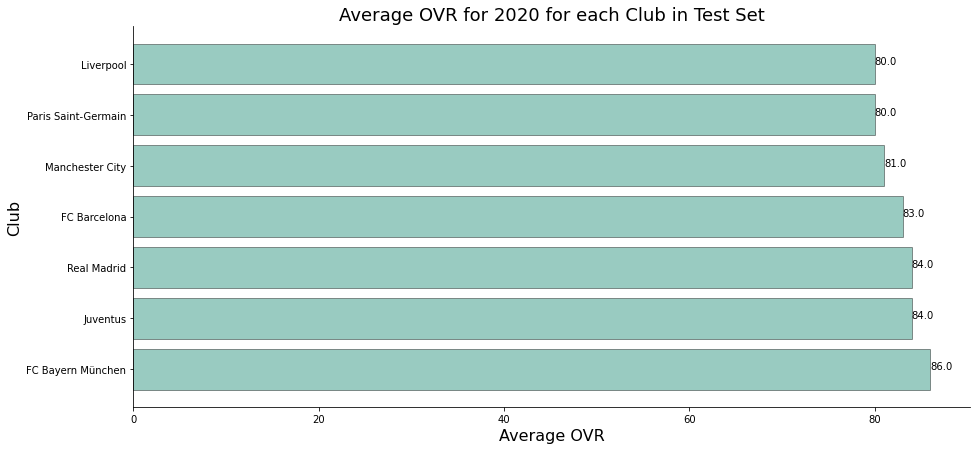

In [42]:
#plotting average OVR of all Test set clubs
avg_real=round(realmadrid.mean(),0)[0]
avg_fcbarca=round(fcbarcelona.mean(),0)[0]
avg_bayernm=round(fcbayernmunchen.mean(),0)[0]
avg_paris=round(parissaintgerm.mean(),0)[0]
avg_juventus=round(Juventus.mean(),0)[0]
avg_manc=round(manchestercity.mean(),0)[0]
avg_livp=round(liverpool.mean(),0)[0]

average_OVR=[avg_bayernm,avg_juventus,avg_real,avg_fcbarca,avg_manc,avg_paris,avg_livp]
club_test=['FC Bayern München','Juventus','Real Madrid','FC Barcelona','Manchester City','Paris Saint-Germain','Liverpool']

fig,ax=plt.subplots(figsize= (15,7))
ax.barh(club_test,average_OVR,alpha=0.4, color = '#007D66',edgecolor='k')
ax.set_xlabel('Average OVR',fontsize=16)
ax.set_ylabel('Club',fontsize=16)
ax.set_title(label='Average OVR for 2020 for each Club in Test Set', fontsize=18)
for index, value in enumerate(average_OVR):
    ax.text(value, index, str(value))
sns.despine()

<div style = "background: #98FB98 ;color:black" class="alert alert-block alert-danger" >
    
*Although the best player (Ronaldo) is from Juventus, however, FC Bayern München has the highest average OVR. The player with the second highest predicted OVR, Manuel Neuer belongs to this team, and the third highest, Lionel Messi is in FC Barcelona.*
    
</div>

<div style = "background: lightblue;color:black" class="alert alert-block alert-danger" >
    
<h2>Part B - Classify player position </h2> 

> *Can a professional defender become a forward?*

1. Train on data from FIFA 19. Predict the player_position variable using other skill statistics for players in the FIFA 20 Edition. Train on all players from FIFA 19

2. Graphically represent the predicted player_position for the players in Test Set 

#### Details : 

* Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. *

* The final score will be assigned using Classification accuracy

* Test Set: Players from the following Clubs: **FC Barcelona, FC Bayern München, Real Madrid, Paris Saint-Germain, Juventus, Atlético Madrid, Manchester City, Liverpool, Manchester United**

</div>

In [43]:
df_1 = pd.read_csv('players_19.csv')
df_1.head()                                     # df_1 is the original dataset of players_19

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [44]:
df = df_1.drop(['sofifa_id', 'player_url', 'long_name', 'short_name', 'wage_eur', 'real_face'], axis = 1)

In [45]:
print(df['player_positions'].isnull().any())      # Checking for NULL values in player_positions
df[['player_positions']].head()

False


,player_positions
0,"ST, LW"
1,"CF, RW, ST"
2,"LW, CAM"
3,GK
4,"CAM, CM"


In [46]:
# Here we are selecting only the first position of the player and discarding multiple positions(if any).
for i in range(len(df['player_positions'].values)):
    if(len(df['player_positions'][i].split(',')))>1:
        df['player_positions'][i] = df['player_positions'][i].split(',')[0]
       

In [47]:
df[['player_positions']]

,player_positions
0,ST
1,CF
2,LW
3,GK
4,CAM
...,...
17765,CM
17766,ST
17767,CM
17768,RB


In [48]:
d={}                                                                
df["player_positions"] = df["player_positions"].astype('category') 
df["player_positions_cat"] = df["player_positions"].cat.codes       ### Encoding the positions of players into integers
for i in range(len(df['player_positions'])):
    d[df['player_positions'][i]] = df['player_positions_cat'][i]

In [49]:
df['player_positions_cat'].unique()

array([14,  3,  8,  5,  0,  1,  4,  2, 12,  6,  7, 10, 11, 13,  9],
      dtype=int8)

In [50]:
df = df.drop(['player_positions'], axis = 1)      # Dropping column of player_positions values of type strings

In [51]:
df.head()

,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,preferred_foot,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,player_positions_cat
0,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,Right,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,14
1,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,Left,...,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2,3
2,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,Right,...,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,8
3,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,Right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,Right,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,0


In [52]:
X = df[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'international_reputation', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
y = df['player_positions_cat']

In [53]:
X.isnull().any()           # Checking for NULL values in the features

age                           False
height_cm                     False
weight_kg                     False
overall                       False
potential                     False
international_reputation      False
weak_foot                     False
skill_moves                   False
pace                           True
shooting                       True
passing                        True
dribbling                      True
defending                      True
physic                         True
attacking_crossing            False
attacking_finishing           False
attacking_heading_accuracy    False
attacking_short_passing       False
attacking_volleys             False
skill_dribbling               False
skill_curve                   False
skill_fk_accuracy             False
skill_long_passing            False
skill_ball_control            False
movement_acceleration         False
movement_sprint_speed         False
movement_agility              False
movement_reactions          

In [54]:
X.dtypes    # Checking data types of features

age                             int64
height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing             object
attacking_finishing            object
attacking_heading_accuracy     object
attacking_short_passing        object
attacking_volleys              object
skill_dribbling                object
skill_curve                    object
skill_fk_accuracy              object
skill_long_passing             object
skill_ball_control             object
movement_acceleration          object
movement_sprint_speed          object
movement_agi

In [55]:
X.head()

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,187,83,94,94,5,4,5,90.0,93.0,...,85,95,28,31,23,7,11,15,14,11
1,31,170,72,94,94,5,4,4,88.0,91.0,...,75,96,33,28,26,6,11,15,14,8
2,26,175,68,92,93,5,5,5,92.0,84.0,...,81,94,27,24,33,9,9,15,15,11
3,27,193,76,91,93,4,3,1,NaN,NaN,...,40,68,15,21,13,90,85,87,88,94
4,27,181,70,91,92,4,5,4,77.0,86.0,...,79,88,67,58,51,15,13,5,10,13


In [56]:
cols = X.select_dtypes(exclude=['float', 'int']).columns    # Converting features into floats for training the model.
X[cols] = X[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [57]:
X.dtypes

age                           float32
height_cm                     float32
weight_kg                     float32
overall                       float32
potential                     float32
international_reputation      float32
weak_foot                     float32
skill_moves                   float32
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing            float32
attacking_finishing           float32
attacking_heading_accuracy    float32
attacking_short_passing       float32
attacking_volleys             float32
skill_dribbling               float32
skill_curve                   float32
skill_fk_accuracy             float32
skill_long_passing            float32
skill_ball_control            float32
movement_acceleration         float32
movement_sprint_speed         float32
movement_agi

In [58]:
for col in X.columns:
    X[col] = X[col].fillna(X[col].median())      ### Replacing null values with the median of columns.
X.head()

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33.0,187.0,83.0,94.0,94.0,5.0,4.0,5.0,90.0,93.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
1,31.0,170.0,72.0,94.0,94.0,5.0,4.0,4.0,88.0,91.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
2,26.0,175.0,68.0,92.0,93.0,5.0,5.0,5.0,92.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27.0,193.0,76.0,91.0,93.0,4.0,3.0,1.0,69.0,54.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27.0,181.0,70.0,91.0,92.0,4.0,5.0,4.0,77.0,86.0,...,79.0,88.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [59]:
df_test = pd.read_csv('players_20.csv')
df_test.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [60]:
df_test = df_test.drop(['sofifa_id', 'player_url', 'long_name', 'short_name', 'wage_eur', 'real_face'], axis = 1)

In [61]:
# Here we are selecting only the first position of the player and discarding multiple positions(if any).
for i in range(len(df_test['player_positions'].values)):
    if(len(df_test['player_positions'][i].split(',')))>1:
        df_test['player_positions'][i] = df_test['player_positions'][i].split(',')[0]
       

In [62]:
df_test["player_positions"] = df_test["player_positions"].astype('category')
df_test["player_positions_cat"] = df_test["player_positions"].cat.codes

In [63]:
df_test = df_test.drop(['player_positions'], axis = 1)

In [64]:
X_test = df_test[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'international_reputation', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
y_test = df_test['player_positions_cat']

In [65]:
cols = X_test.select_dtypes(exclude=['float', 'int']).columns
X_test[cols] = X_test[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [66]:
for col in X.columns:
    X_test[col] = X_test[col].fillna(X_test[col].median())
X_test.head()

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32.0,170.0,72.0,94.0,94.0,5.0,4.0,4.0,87.0,92.0,...,75.0,96.0,33.0,37.0,26.0,6.0,11.0,15.0,14.0,8.0
1,34.0,187.0,83.0,93.0,93.0,5.0,4.0,5.0,90.0,93.0,...,85.0,95.0,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
2,27.0,175.0,68.0,92.0,92.0,5.0,5.0,5.0,91.0,85.0,...,90.0,94.0,27.0,26.0,29.0,9.0,9.0,15.0,15.0,11.0
3,26.0,188.0,87.0,91.0,93.0,3.0,3.0,1.0,69.0,54.0,...,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,89.0
4,28.0,175.0,74.0,91.0,91.0,4.0,4.0,4.0,91.0,83.0,...,88.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [67]:
A=[]                                              # Finding good value of C to fit our model to the data.
for c in range(1,100,1):      
    model = LogisticRegression(C = c)
    model.fit(X,y)
    y_pred_test1 = model.predict(X_test)
    A.append(accuracy_score(y_test, y_pred_test1))

Text(0, 0.5, 'Accuracy Score')

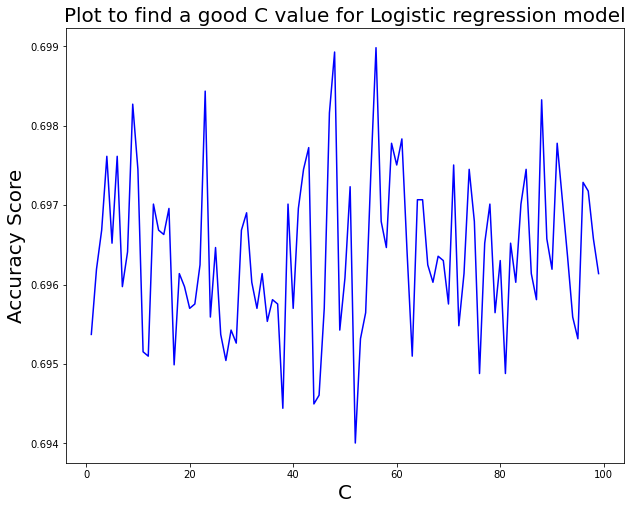

In [68]:
plt.figure(figsize=(10,8))
plt.plot(range(1,100,1), A, c='b')
plt.title('Plot to find a good C value for Logistic regression model', size = 20)
plt.xlabel('C', size = 20)
plt.ylabel('Accuracy Score', size = 20)

In [69]:
model = LogisticRegression(C = 56)
model.fit(X,y)

LogisticRegression(C=56)

In [70]:
y_pred_test = model.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
print('The Classification Accuracy of the model =',accuracy_score(y_test, y_pred_test))

The Classification Accuracy of the model = 0.6989823831929095


In [73]:
def GetKey(val):
    for key, value in d.items():         # A function to get the keys of a dictionary whose values are known.
        if val == value:
            return key

In [74]:
positions_test=[]                  # Defining two lists to store the player positions
positions_pred=[]
print('Ground Truth  Prediction')
for i,j in zip(y_pred_test, y_test):  
    positions_test.append(GetKey(j))
    positions_pred.append(GetKey(i))
    print(GetKey(i)+ '               '+ GetKey(j))
    

Ground Truth  Prediction
CAM               RW
ST               ST
CAM               LW
GK               GK
CAM               LW
CM               CAM
GK               GK
CB               CB
CM               CM
ST               RW
ST               ST
CB               CB
ST               ST
GK               GK
GK               GK
CDM               CDM
CB               CB
ST               ST
CB               CB
ST               ST
ST               ST
CDM               CDM
ST               CF
CAM               CAM
CM               CM
GK               GK
RM               RW
CAM               CAM
GK               GK
CB               CB
GK               GK
GK               GK
GK               GK
CAM               CAM
ST               ST
CB               CB
CM               CM
CAM               CAM
ST               ST
ST               LW
CB               CB
CAM               RW
CDM               CDM
RM               CF
CDM               CDM
CB               CB
ST               CF
CB            

Text(0.5, 0, 'Positions')

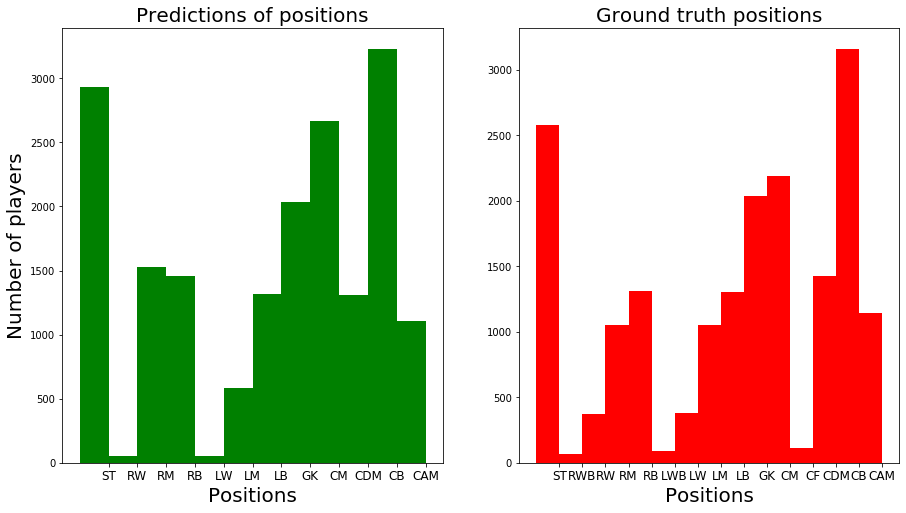

In [58]:
from collections import Counter
counts_pred = Counter(positions_pred)

labels1, heights1 = zip(*sorted(((k, v) for k, v in counts_pred.items()), reverse=True))
left1 = np.arange(len(heights1))
fig, ax = plt.subplots(1, 2)
ax[0].bar(left1, heights1, 1, color = 'g')
ax[0].set_xticks(left1 + 0.5)
ax[0].set_xticklabels(labels1,  fontsize='large')
ax[0].set_title('Predictions of positions', size = 20)
ax[0].set_xlabel('Positions', size = 20)
ax[0].set_ylabel('Number of players', size = 20)

counts = Counter(positions_test)

labels2, heights2 = zip(*sorted(((k, v) for k, v in counts.items()), reverse=True))
fig.set_figheight(8)
fig.set_figwidth(15)
left2 = np.arange(len(heights2))
ax[1].bar(left2, heights2, 1, color='r')
ax[1].set_xticks(left2 + 0.5)
ax[1].set_xticklabels(labels2,  fontsize='large')
ax[1].set_title('Ground truth positions', size = 20)
ax[1].set_xlabel('Positions', size = 20)

<div style = "background: #98FB98 ;color:black" class="alert alert-block alert-danger" >
    
*We can observe that the predictions are fairly close to the ground truth positions of players in the test set.*
    
</div>

In [59]:
 # Considering RB, LB, CB, to be professional defenders and CF, ST to be forwards 
print('Unique position of players')
print(d)

Unique position of players
{'ST': 14, 'CF': 3, 'LW': 8, 'GK': 5, 'CAM': 0, 'CB': 1, 'CM': 4, 'CDM': 2, 'RW': 12, 'LB': 6, 'LM': 7, 'RB': 10, 'RM': 11, 'RWB': 13, 'LWB': 9}


In [60]:
df_1.head()   ### The players_19 data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [61]:
df_test_1 = pd.read_csv('players_20.csv')
df_test_1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


### Collecting all the professional defending players data 

In [62]:
df_RB = df_1[df_1['player_positions'] == 'RB']
df_LB = df_1[df_1['player_positions'] == 'LB']  
df_CB = df_1[df_1['player_positions'] == 'CB']

In [63]:
RB_players = df_RB['sofifa_id'].values
LB_players = df_LB['sofifa_id'].values       # Collecting the unique sofifa ID's of players
CB_players = df_CB['sofifa_id'].values

### Collecting Forward players data

In [ ]:
df_ST_test = df_test_1[df_test_1['player_positions'] == 'ST']
df_CF_test = df_test_1[df_test_1['player_positions'] == 'CF']

### Observing if any professional defender in 2019 has changed to forward position in 2020

In [ ]:
RBtoCF=[]
LBtoCF=[]
CBtoCF=[]
RBtoST=[]
LBtoST=[]
CBtoST=[]
for i in df_CF_test['sofifa_id'].values:
    if(i in df_RB['sofifa_id']):
        RBtoCF.append(i)
    if(i in df_LB['sofifa_id']):
        LBtoCF.append(i)
    if(i in df_CB['sofifa_id']):
        CBtoCF.append(i)
        
for i in df_ST_test['sofifa_id'].values:
    if(i in df_RB['sofifa_id']):
        RBtoST.append(i)
    if(i in df_LB['sofifa_id']):
        LBtoST.append(i)
    if(i in df_CB['sofifa_id']):
        RBtoST.append(i)
        

In [ ]:
print('Number of players from RB to CF = ',len(RBtoCF))
print('Number of players from LB to CF = ',len(LBtoCF))
print('Number of players from CB to CF = ',len(CBtoCF))
print('Number of players from RB to ST = ',len(RBtoST))
print('Number of players from LB to ST = ',len(LBtoST))
print('Number of players from CB to ST = ',len(CBtoST))

<div style = "background: lightgreen ;color:black" class="alert alert-block alert-danger" >

## Therefore, we can see that no defender has converted to a forward position. 
    
</div>

<div style = "background: lightblue;color:black" class="alert alert-block alert-danger" >
    
<h2>Part C - Which Club has the Best Staff  </h2>

> *The best staff always help their players grow, can you identify that using historical data?*

1. Study player data from Division 1 European League* players from the last 5 Years. Analyze changes in player stats and value. Rank the clubs according to best increase in statistics of a player

2. Graphically represent the scores for the test set

#### Details :

* Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. 

* Assign a score to all clubs out of 100, and represent it in an appropriate visualization. With 100 being the highest 

* For the test set, your model will be scored using MSE against the average of all models of the class. (Score = MSE( Your Values , Average of all models values))

* The test set is as follows for this problem statement (Division 1 European League):

    * Leagues to be considered: 

        * Premier League - English Premier League
        * Bundesliga German 1. Bundesliga
        * Ligue 1 French Ligue 1
        * La Liga Spain Primera Division
        * Serie A Italian Serie A
 
</div>

In [ ]:
df_teams=pd.read_csv(zf.open('teams_and_leagues.csv'))
leagues=['English Premier League ','German 1. Bundesliga ','French Ligue 1 ','Spain Primera Division ','Italian Serie A ']

df_teams1=df_teams[df_teams['league_name'].isin(leagues)]
print(df_teams1.shape)
df_teams1.head()

In [ ]:
df_16=pd.read_csv(zf.open('players_16.csv'))
df_17=pd.read_csv(zf.open('players_17.csv'))
df_18=pd.read_csv(zf.open('players_18.csv'))
df_19=pd.read_csv(zf.open('players_19.csv'))
df_20=pd.read_csv(zf.open('players_20.csv'))
df_teams2=pd.read_csv('teams2.csv')


In [ ]:
# Taking into consideration only the players from the datasets
# that played in the Division 1 European League 

team_playing=list(df_teams2['team_name'].values)


In [74]:
df_16_final= pd.DataFrame() 
df_16['played']=0

for i in team_playing:
    for j in range(len(df_16)):
        if i==df_16.iloc[j]['club']:
            df_16.iloc[j, df_16.columns.get_loc('played')]=1
            
df_16_final= df_16[df_16.played == 1]

In [75]:
df_17_final= pd.DataFrame() 
df_17['played']=0

for i in team_playing:
    for j in range(len(df_17)):
        if i==df_17.iloc[j]['club']:
            df_17.iloc[j, df_17.columns.get_loc('played')]=1
            

df_17_final= df_17[df_17.played == 1]


In [76]:
df_18_final= pd.DataFrame() 
df_18['played']=0
for i in team_playing:
    for j in range(len(df_18)):
        if i==df_18.iloc[j]['club']:
            df_18.iloc[j, df_18.columns.get_loc('played')]=1
            

df_18_final= df_18[df_18.played == 1]

KeyboardInterrupt: 

In [ ]:
df_19_final= pd.DataFrame() 
df_19['played']=0
for i in team_playing:
    for j in range(len(df_19)):
        if i==df_19.iloc[j]['club']:
            df_19.iloc[j, df_19.columns.get_loc('played')]=1
            

df_19_final= df_19[df_19.played == 1]

In [ ]:
df_20_final= pd.DataFrame() 
df_20['played']=0
for i in team_playing:
    for j in range(len(df_20)):
        if i==df_20.iloc[j]['club']:
            df_20.iloc[j, df_20.columns.get_loc('played')]=1
            

df_20_final= df_20[df_20.played == 1]

In [ ]:
# Finding the correlation between variables to pick one as the response
corrMatrix = df_16_final[['value_eur','overall','age','potential']].corr()
sns.heatmap(corrMatrix, annot=True) 
plt.show()

<div style = "background: #98FB98 ;color:black" class="alert alert-block alert-danger" >

<I>From the matrix, it can be observed that value of a player is correlated with the overall score. Also, the value of a player seems like a factor which can be associated better with the club that he plays for.</I> 
<H3> Hence, value_eur is chosen as the response variable</H3>
    
</div>

In [ ]:
dict_16={}
for i in list(df_16_final['club'].values):
    dict_16[i]=(df_16_final.groupby('club')['value_eur'].sum()[i]),(df_16_final.groupby('club')['overall'].sum()[i])
   

In [ ]:
print(dict_16,len(dict_16))

In [ ]:
dict_17={}
for i in list(df_17_final['club'].values):
    dict_17[i]=df_17_final.groupby('club')['value_eur'].sum()[i],df_17_final.groupby('club')['overall'].sum()[i]

In [ ]:
print(dict_17,len(dict_17))

In [ ]:
dict_18={}
for i in list(df_18_final['club'].values):
    dict_18[i]=df_18_final.groupby('club')['value_eur'].sum()[i],df_18_final.groupby('club')['overall'].sum()[i]
print(dict_18,len(dict_18))    

In [ ]:
dict_19={}
for i in list(df_19_final['club'].values):
    dict_19[i]=df_19_final.groupby('club')['value_eur'].sum()[i],df_19_final.groupby('club')['overall'].sum()[i]
print(dict_19,len(dict_19)) 

In [ ]:
dict_20={}
for i in list(df_20_final['club'].values):
    dict_20[i]=df_20_final.groupby('club')['value_eur'].sum()[i],df_20_final.groupby('club')['overall'].sum()[i]
print(dict_20,len(dict_20)) 

In [ ]:
df=pd.DataFrame()
df['club']=df_teams2['team_name']
values_16=[]
ovr_16=[]
list_16=list(dict_16.items())

In [ ]:
list_16[20][1]
df_16_final['val_16']=0


In [ ]:
# The final dataframe

df['value_16,ovr_16']=0
df['value_17,ovr_17']=0
df['value_18,ovr_18']=0
df['value_19,ovr_19']=0
df['value_20,ovr_20']=0
df['value_16,ovr_16'] = df['club'].map(dict_16)
df['value_17,ovr_17'] = df['club'].map(dict_17)
df['value_18,ovr_18'] = df['club'].map(dict_18)
df['value_19,ovr_19'] = df['club'].map(dict_19)
df['value_20,ovr_20'] = df['club'].map(dict_20)

In [ ]:
years=['value_16,ovr_16','value_17,ovr_17','value_18,ovr_18','value_19,ovr_19','value_20,ovr_20']

In [ ]:
df[['value_16','ovr_16']] = pd.DataFrame(df['value_16,ovr_16'].tolist(), index= df.index)
df[['value_17','ovr_17']] = pd.DataFrame(df['value_17,ovr_17'].tolist(), index= df.index)
df[['value_18','ovr_18']] = pd.DataFrame(df['value_18,ovr_18'].tolist(), index= df.index)
df[['value_19','ovr_19']] = pd.DataFrame(df['value_19,ovr_19'].tolist(), index= df.index)
df[['value_20','ovr_20']] = pd.DataFrame(df['value_20,ovr_20'].tolist(), index= df.index)
df.drop(years,inplace=True,axis=1)

In [ ]:
df['avg_value_till_19']=df[['value_16','value_17','value_18','value_19']].sum(axis=1)/4
df['avg_ovr_till_19']=df[['ovr_16','ovr_17','ovr_18','ovr_19']].sum(axis=1)/4
df['avg_ovr_till_20']=df[['ovr_16','ovr_17','ovr_18','ovr_19','ovr_20']].sum(axis=1)/4
df['avg_value_till_20']=df[['value_16','value_17','value_18','value_19','value_20']].sum(axis=1)/5

In [ ]:
df['potential_19']=df_19_final['potential']
df['potential_20']=df_20_final['potential']


In [ ]:
skillset=['age','international_reputation','pace','shooting','passing','defending','physic','gk_speed','gk_positioning', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [ ]:
df['age_19']=df_19_final['age']
df['age_20']=df_20_final['age']
df['physic_19']=df_19_final['physic']
df['physic_20']=df_20_final['physic']
df['gk_speed_19']=df_19_final['gk_speed']
df['gk_speed_20']=df_20_final['gk_speed']
df['gk_positioning_19']=df_19_final['gk_positioning']
df['gk_positioning_20']=df_20_final['gk_positioning']
df['skill_fk_accuracy_19']=df_19_final['skill_fk_accuracy']
df['skill_fk_accuracy_20']=df_20_final['skill_fk_accuracy']
df['skill_curve_19']=df_19_final['skill_curve']
df['skill_curve_20']=df_20_final['skill_curve']


In [ ]:
from sklearn import preprocessing 

In [ ]:
var=['avg_ovr_till_19','ovr_20','avg_value_till_19','avg_value_till_20']

In [ ]:
# Normalising the data

model=preprocessing.StandardScaler()
data=model.fit_transform(df[var])
df1=pd.DataFrame(data)
df1=df1.rename(columns = {0:'avg_ovr_till_19' , 1: 'ovr_20',2:'avg_value_till_19',3:'avg_value_till_20'}, inplace = False)


In [ ]:
column=['skill_curve_19','skill_curve_20','skill_fk_accuracy_19','skill_fk_accuracy_20','gk_positioning_19','gk_positioning_20','gk_speed_19','gk_speed_20','value_16', 'ovr_16', 'value_17', 'ovr_17', 'value_18','ovr_18', 'value_19', 'ovr_19', 'value_20', 'ovr_20','physic_19','physic_20', 'avg_value_till_19','avg_ovr_till_19', 'avg_value_till_20', 'avg_ovr_till_20','potential_19', 'potential_20','age_19','age_20']
for col in column:
    df[col] = df[col].fillna(df[col].median())
df.head()

In [ ]:
# Training a model with ovr, potential, age, and  physic

x_train=df[['ovr_19','potential_19','age_19']]
y_train=df1['avg_value_till_19']
x_test=df[['ovr_20','potential_20','age_20']]
y_test=df1['avg_value_till_20']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
x_poly_train=PolynomialFeatures(degree=20).fit_transform(x_train,y_train)
x_poly_test=PolynomialFeatures(degree=20).fit_transform(x_test,y_test)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f'The test MSE is {mse}')
r2score=r2_score(y_test, y_pred_test)
print('The r2 score is ',r2score)


In [ ]:
# Finding the score for all the clubs based on predicted value 

import numpy as np
df['score']=np.square(y_pred_test)
    

In [ ]:
total_score=df['score'].sum()


In [ ]:
# Finding the value distribution in percent
score_per_cent=[]
for i in df['score'].values:
    score_per_cent.append(i*100/total_score)
    

In [ ]:
df['score_per_cent']=score_per_cent

In [ ]:
df=df.sort_values(by='score_per_cent',axis=0,ascending=False)

In [ ]:
# Ranking the clubs

ranks=range(1,len(df)+1)
df['ranks']=ranks

In [ ]:
print('The top twenty clubs are ',df['club'].values[0:20])

In [ ]:
print('The bottom five clubs are', df['club'].values[92:97])

<H3> FC Barcelona is predicted to be the best club</H3>

In [ ]:
#Plotting the distribution of the scores
my_circle=plt.Circle( (0,0), 0.5, color='white')
from palettable.colorbrewer.qualitative import Pastel1_9
labels =[ i for i in df['club'].values]
sizes = df.score_per_cent.values
plt.figure(figsize=(15,15))
plt.pie(sizes, labels=labels,colors=Pastel1_9.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(labels,loc='best')
plt.title('Distribution of scores',fontsize=17)
plt.show()


In [ ]:
colors = sns.color_palette('rocket')

# Plotting the test scores for the top 20 clubs

test_score=np.square(y_test)
club_val = df['club'].values
data = list(zip(club_val,test_score))
df_test = pd.DataFrame(data,columns=['club','score'])
df_test=df_test.sort_values(by='score',axis=0,ascending=False)
df_top_test = df_test[0:20]
top_clubs_test = df_top_test['club'].values
plt.figure(figsize=(10,8))
plt.barh(df_top_test['club'],df_top_test['score'],color=colors)
plt.xlabel('Score',fontsize=14)
plt.ylabel('Top 20 Clubs',fontsize=14)
plt.title('Top 20 clubs with test scores',fontsize=17)

In [ ]:
#Plotting the scores for the top 20 clubs

df_top = df[0:20]
top_clubs = df_top['club'].values
plt.figure(figsize=(10,8))
plt.barh(df_top['club'],df_top['score'],color=colors)
plt.xlabel('Score',fontsize=14)
plt.ylabel('Top 20 Clubs',fontsize=14)
plt.title('Top 20 clubs with predicted scores',fontsize=17)

<div style = "background: lightgreen ;color:black" class="alert alert-block alert-danger" >

<h3>FC Barcelona has the best staff, as per the analysis.</h3>

</div>